# 📈 Descomposición de la Serie de Tiempo y Estacionariedad

El objetivo de esta fase es separar cada serie de tiempo (Máxima y Mínima) en sus componentes fundamentales: Tendencia (T), Estacionalidad (S) y Residuo (R). Además, utilizaremos pruebas estadísticas (Test de Dickey-Fuller Aumentado - ADF) para validar la no-estacionariedad de ambas series, un requisito clave para el modelado ARIMA.

In [1]:
# --- 1. Configuración e Importación ---
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Configuración de matplotlib para gráficos más limpios
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('seaborn-v0_8-whitegrid')

# Cargar el DataFrame limpio del módulo anterior
try:
    df = pd.read_csv(
        'dataset/pinar_del_rio_temperaturas_LIMPIO_FINAL.csv', 
        index_col='Fecha', 
        parse_dates=True
    )
    print("✅ Datos limpios cargados exitosamente.")
except FileNotFoundError:
    print("❌ ERROR: Asegúrate de tener el archivo 'pinar_del_rio_temperaturas_LIMPIO_FINAL.csv' en el directorio.")
    df = None

if df is not None:
    # Cargaremos ambas columnas para la descomposición y el test ADF
    ts_maxima = df['Temp_Maxima_C']
    ts_minima = df['Temp_Minima_C']

✅ Datos limpios cargados exitosamente.



--- 2.1 Realizando Descomposición Aditiva para Temp. Máxima ---

--- 3.1 Gráfico de Descomposición para Temp. Máxima ---


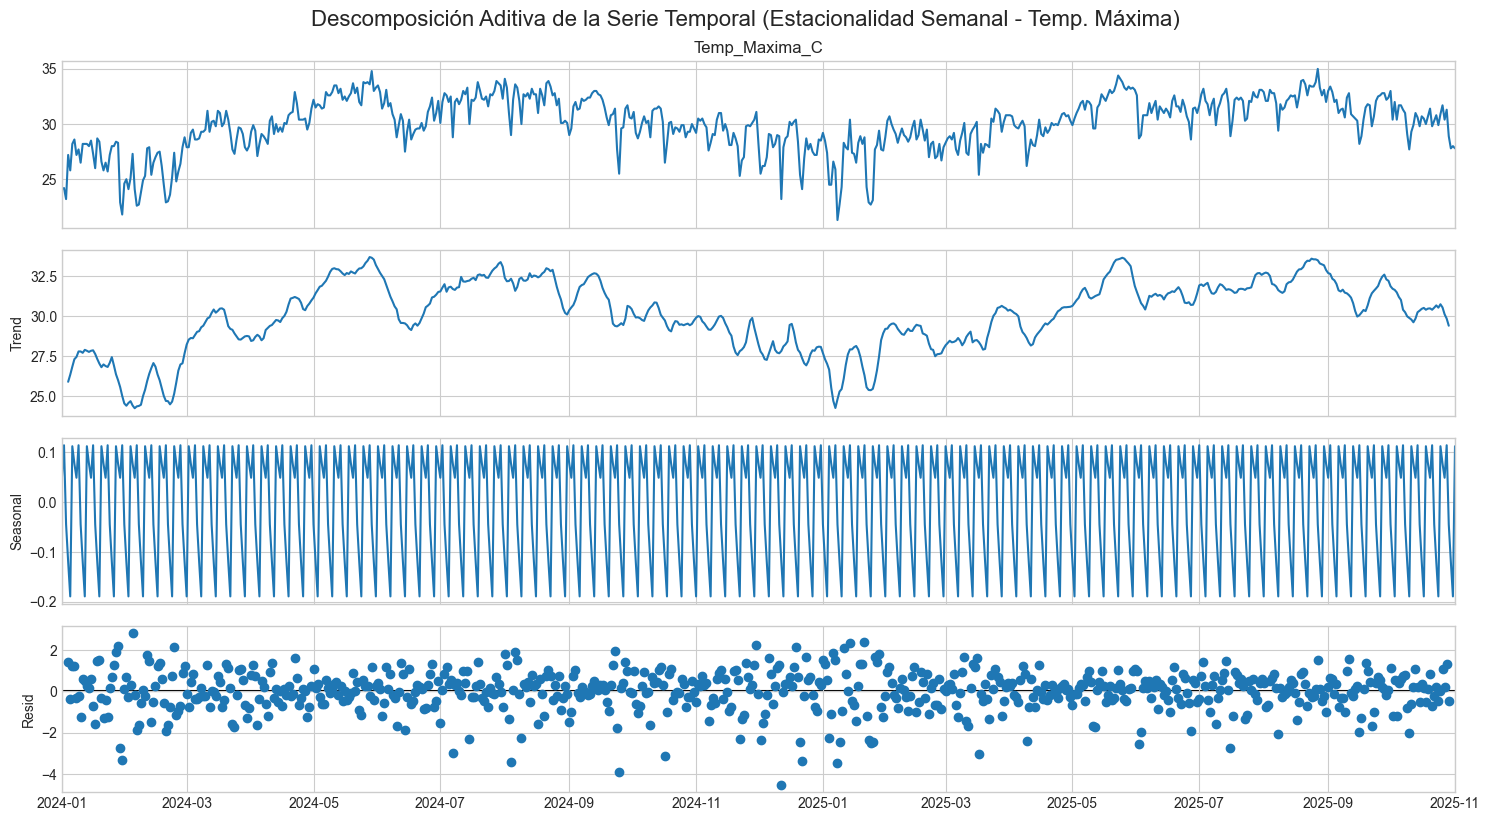


--- 2.1 Realizando Descomposición Aditiva para Temp. Mínima ---

--- 3.1 Gráfico de Descomposición para Temp. Mínima ---


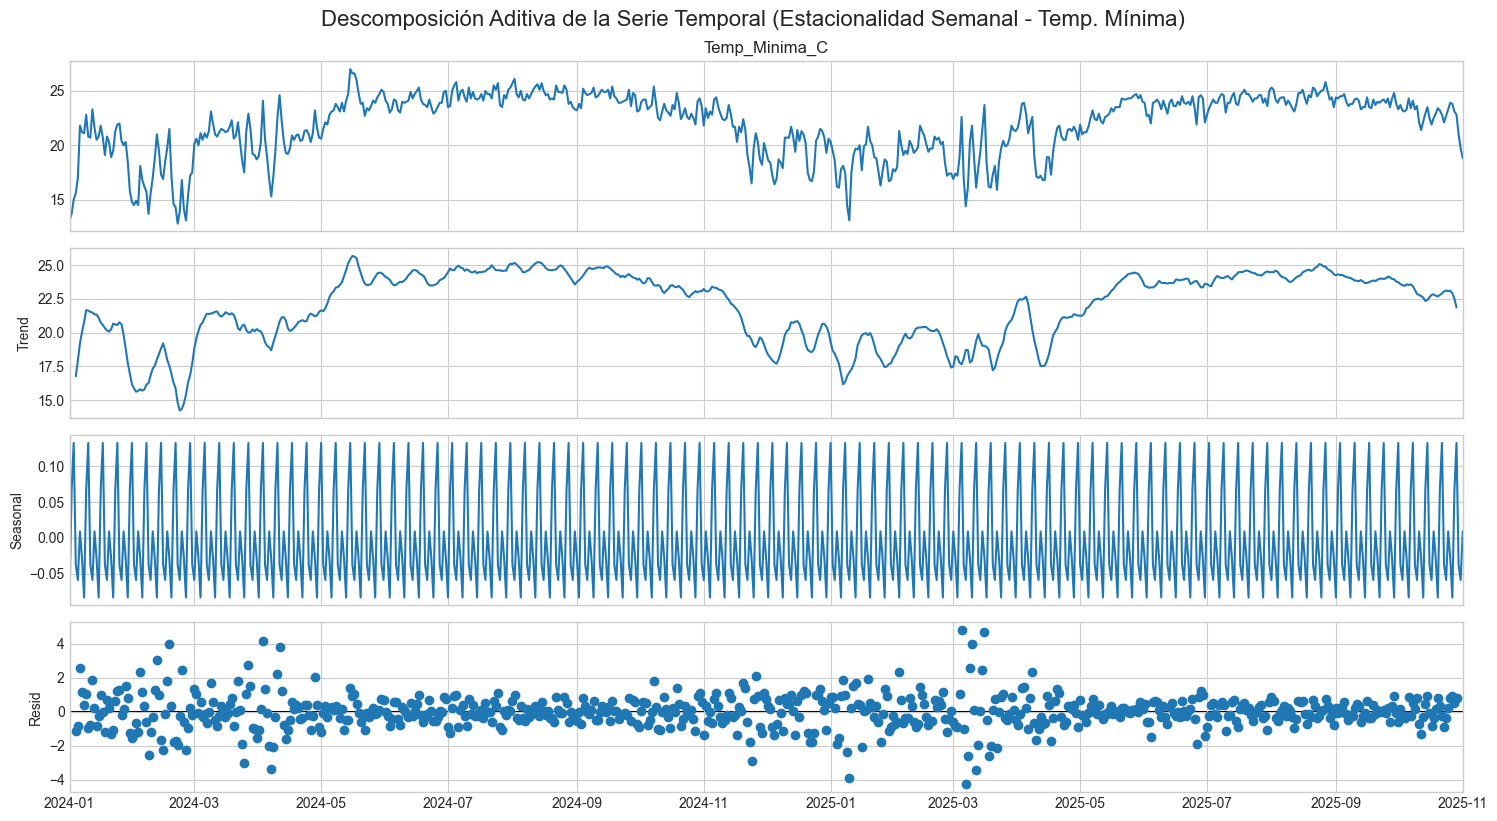

In [3]:
# --- 2. Función de Descomposición y Visualización ---

def descomponer_y_graficar(serie, titulo):
    """
    Realiza la descomposición aditiva de una serie y grafica sus componentes.
    """
    print(f"\n--- 2.1 Realizando Descomposición Aditiva para {titulo} ---")
    
    # 🚨 CORRECCIÓN: Se cambia el periodo de 365 a 7 (Estacionalidad Semanal).
    # La serie solo tiene 671 días, insuficiente para 2 ciclos de 365 días (730 días requeridos).
    # Usaremos period=7 para capturar la estacionalidad semanal.
    descomposicion = sm.tsa.seasonal_decompose(serie, model='additive', period=7)
    
    # 3. Visualización de los Componentes
    print(f"\n--- 3.1 Gráfico de Descomposición para {titulo} ---")
    descomposicion.plot()
    plt.suptitle(f'Descomposición Aditiva de la Serie Temporal (Estacionalidad Semanal - {titulo})', fontsize=16, y=1.02)
    plt.show()

    return descomposicion

# Aplicar a ambas series
descomposicion_max = descomponer_y_graficar(ts_maxima, 'Temp. Máxima')
descomposicion_min = descomponer_y_graficar(ts_minima, 'Temp. Mínima')

In [4]:
# --- 4. Validación Estadística: Test de Dickey-Fuller Aumentado (ADF) ---
# Confirmar la no-estacionariedad de la serie original.
# H0 (Hipótesis Nula) = La serie NO es estacionaria (tiene una raíz unitaria).

print("\n--- 4.1 Ejecutando Test ADF para la Estacionariedad ---")

def test_adfuller(serie):
    """
    Función para ejecutar e imprimir los resultados clave del Test ADF.
    """
    print(f"\nResultados del Test ADF para la variable: {serie.name}")
    # Se utiliza 'ct' (constante y tendencia) como mejor ajuste para datos con tendencia
    resultado = adfuller(serie, autolag='AIC', regression='ct')
    
    df_resultados = pd.Series(resultado[0:4], index=[
        'Estadístico de Test (ADF)',
        'P-valor',
        'Lags Usados',
        'Observaciones Usadas'
    ])
    
    print(df_resultados.to_string())
    print("\nValores Críticos de Estacionariedad:")
    for key, value in resultado[4].items():
        print(f'   {key}: {value}')

    # Interpretación profesional del resultado
    p_valor = resultado[1]
    print("\n--- Conclusión del Test ADF ---")
    if p_valor <= 0.05:
        print(f"✅ Rechazamos H0 (p-valor={p_valor:.4f}). La serie **ES ESTACIONARIA**.")
        print("Esto sugiere que la serie no requiere diferenciación (d=0) para su modelado.")
    else:
        print(f"⚠️ Aceptamos H0 (p-valor={p_valor:.4f}). La serie **NO ES ESTACIONARIA** (requiere diferenciación).")
        print("La no-estacionariedad se debe a la clara TENDENCIA (alcista/decreciente) visible en los gráficos.")


# Aplicar el test a ambas series de temperatura
test_adfuller(ts_maxima)
test_adfuller(ts_minima)


--- 4.1 Ejecutando Test ADF para la Estacionariedad ---

Resultados del Test ADF para la variable: Temp_Maxima_C
Estadístico de Test (ADF)     -3.304938
P-valor                        0.065445
Lags Usados                    6.000000
Observaciones Usadas         664.000000

Valores Críticos de Estacionariedad:
   1%: -3.972469122787829
   5%: -3.4171226978115867
   10%: -3.1309529546759767

--- Conclusión del Test ADF ---
⚠️ Aceptamos H0 (p-valor=0.0654). La serie **NO ES ESTACIONARIA** (requiere diferenciación).
La no-estacionariedad se debe a la clara TENDENCIA (alcista/decreciente) visible en los gráficos.

Resultados del Test ADF para la variable: Temp_Minima_C
Estadístico de Test (ADF)     -3.694140
P-valor                        0.022746
Lags Usados                    4.000000
Observaciones Usadas         666.000000

Valores Críticos de Estacionariedad:
   1%: -3.972427788495554
   5%: -3.4171027175128486
   10%: -3.130941206980863

--- Conclusión del Test ADF ---
✅ Rechazamos H0